In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
import numpy as np
import pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory

images = pathlib.Path(/content/drive/MyDrive/Kaggle/Tests/TestA')
test_data = image_dataset_from_directory(images,
                                        subset=None,
                                         seed=123,
                                         image_size=(360,360))

Found 4350 files belonging to 8 classes.


In [ ]:
import tensorflow as tf

def normalizer(image,label):
    image = tf.cast(image/255, tf.float32)
    return image,label

test_data_norm = test_data.map(normalizer)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model_15 CNN RB.h5',compile=False)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 358, 358, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 179, 179, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 177, 177, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 88, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 236672)            0

In [ ]:
y_pred = model.predict(test_data_norm)

In [ ]:
y_true = np.concatenate([y for x,y in test_data_norm])

In [ ]:
y_pred_class = y_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

           0       0.03      0.02      0.02        89
           1       0.07      0.84      0.14       322
           2       0.00      0.00      0.00         4
           3       0.28      0.01      0.02      1034
           4       0.06      0.04      0.05       234
           5       0.56      0.00      0.00      2660
           6       0.01      0.25      0.01         4
           7       0.00      0.00      0.00         3

    accuracy                           0.07      4350
   macro avg       0.12      0.15      0.03      4350
weighted avg       0.42      0.07      0.02      4350



/home/benjamin/anaconda3/envs/gpu2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/benjamin/anaconda3/envs/gpu2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/benjamin/anaconda3/envs/gpu2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

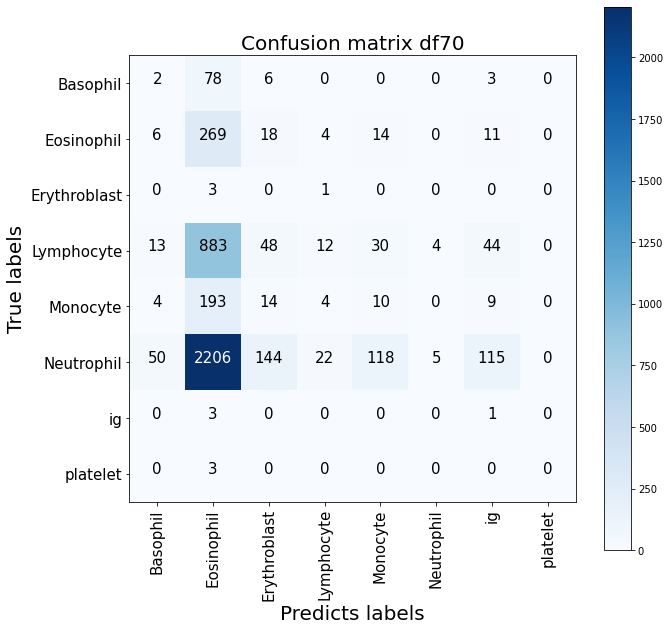

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

cnf_matrix = confusion_matrix(y_true, y_pred_class)

classes = test_data.class_names

plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70",fontsize=20)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation =90,fontsize=15)
plt.yticks(tick_marks, classes,fontsize=15)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_class))
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black",
            fontsize=15)

plt.ylabel('True labels',fontsize=20)
plt.xlabel('Predicts labels',fontsize=20)
plt.show()

In [ ]:
images = pathlib.Path('dataset_normal')
val_data= image_dataset_from_directory(images,
                                          validation_split=0.2,
                                          subset='validation',
                                         seed=123,
                                         image_size=(360,360))

Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


In [ ]:
val_data_norm =val_data.map(normalizer)


In [ ]:
y_true = np.concatenate([y for x,y in val_data_norm])

In [ ]:
y_pred_2 = y_pred = model.predict(val_data_norm )

In [ ]:
y_pred_2_class = y_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_2_class))

              precision    recall  f1-score   support

           0       0.07      0.06      0.07       232
           1       0.21      0.20      0.20       652
           2       0.08      0.08      0.08       312
           3       0.18      0.19      0.18       592
           4       0.09      0.09      0.09       240
           5       0.10      0.10      0.10       274
           6       0.19      0.19      0.19       647
           7       0.15      0.15      0.15       469

    accuracy                           0.15      3418
   macro avg       0.13      0.13      0.13      3418
weighted avg       0.15      0.15      0.15      3418



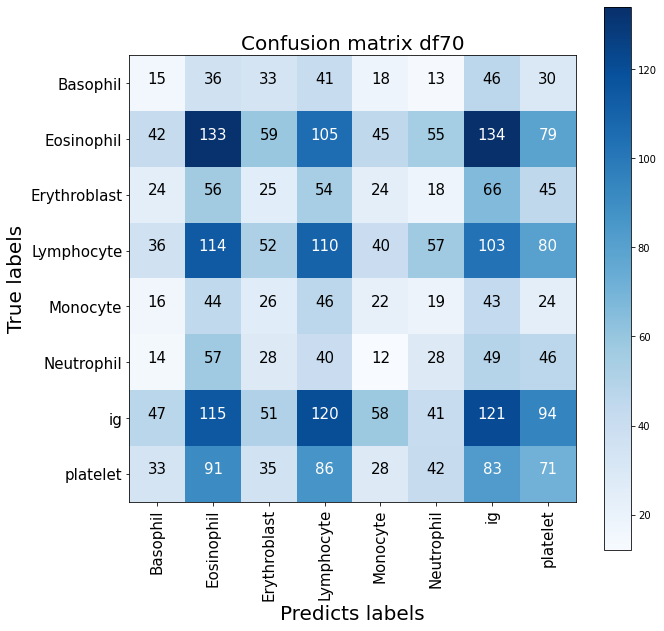

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

cnf_matrix = confusion_matrix(y_true, y_pred_2_class)

classes = test_data.class_names

plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70",fontsize=20)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation =90,fontsize=15)
plt.yticks(tick_marks, classes,fontsize=15)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black",
            fontsize=15)

plt.ylabel('True labels',fontsize=20)
plt.xlabel('Predicts labels',fontsize=20)
plt.show()